## Import the modules required for plotting chart

In [36]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Import google earth engine (gee) api and initialize the athentication

In [3]:
import ee
ee.Initialize()

## Import image and feature of your requirement
In my case I have taken Landsat 5 year composite for image and Nepal's Bagmati zone as feature.
Make sure you have single feature in the feature collection

In [22]:
# Load input imagery: Landsat 5-year composit
image = ee.Image('LANDSAT/LE7_TOA_5YEAR/2008_2012')

admin2 = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level2");

region = admin2.filter(ee.Filter.eq('ADM2_NAME', 'Bagmati'))


## Apply the Histogram reducer on the geometry we have taken.
Be sure you adjust other parameters like scale as per your image instant and necessity

In [38]:
# Reduce the region. The region parameter is the Feature geometry.
histogramDictionary = image.reduceRegion(**{
  'reducer': ee.Reducer.histogram(30),
  'geometry': region.geometry(),
  'scale': 30,
  'maxPixels': 1e19
})

# The result is a Dictionary.  Print it.
# print(histogramDictionary.getInfo())

## Convert the gee dictionary object to client side python dictionary

In [23]:
histogram = histogramDictionary.getInfo()

## Extract the Band information
You can take the band information as per your need. Please modify the list for band as per your need

In [24]:
bands = list(histogram.keys())
bands

['B1', 'B2', 'B3', 'B4', 'B5', 'B6_VCID_2', 'B7']

## Plot the histogram plot for each bands

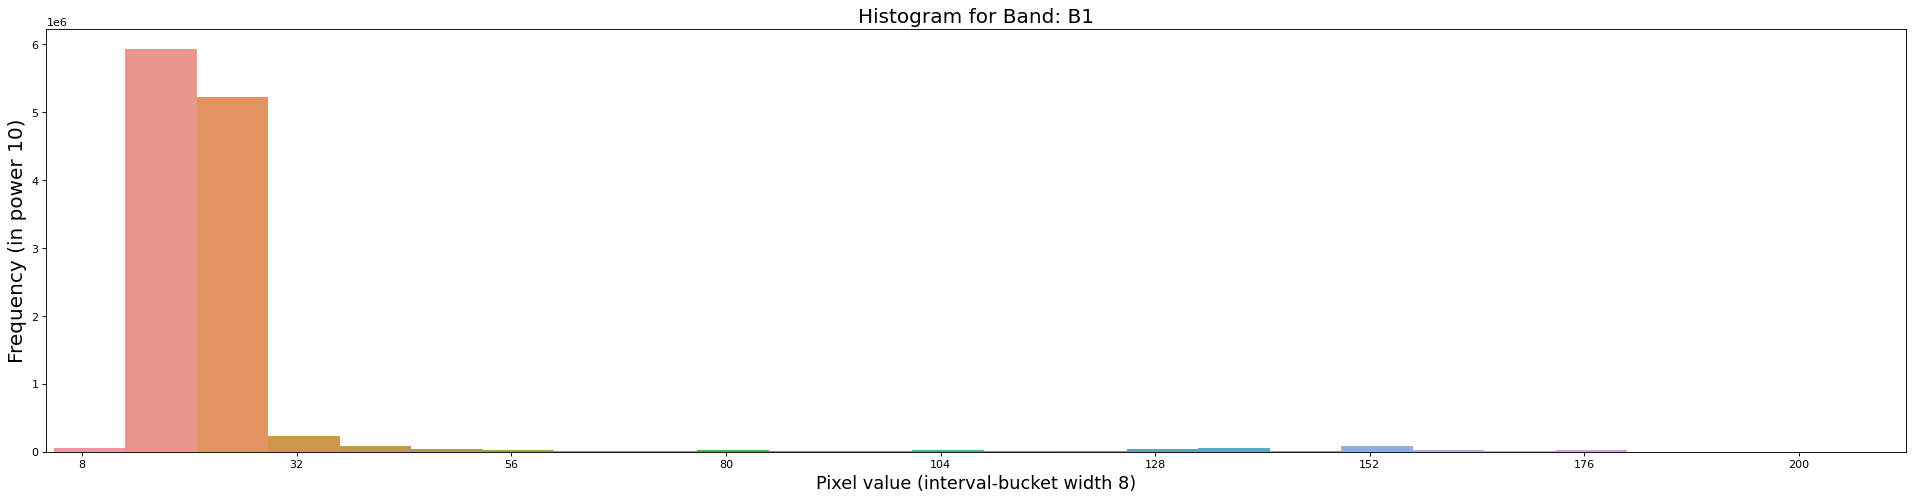

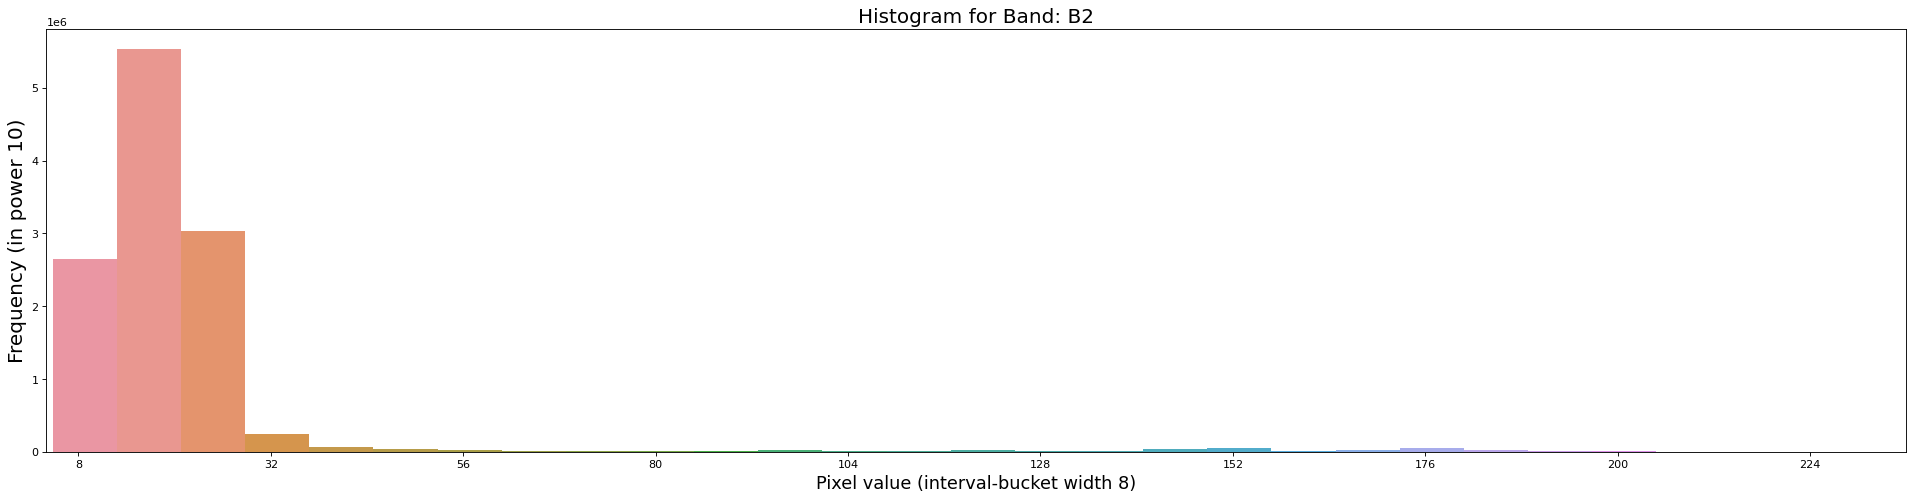

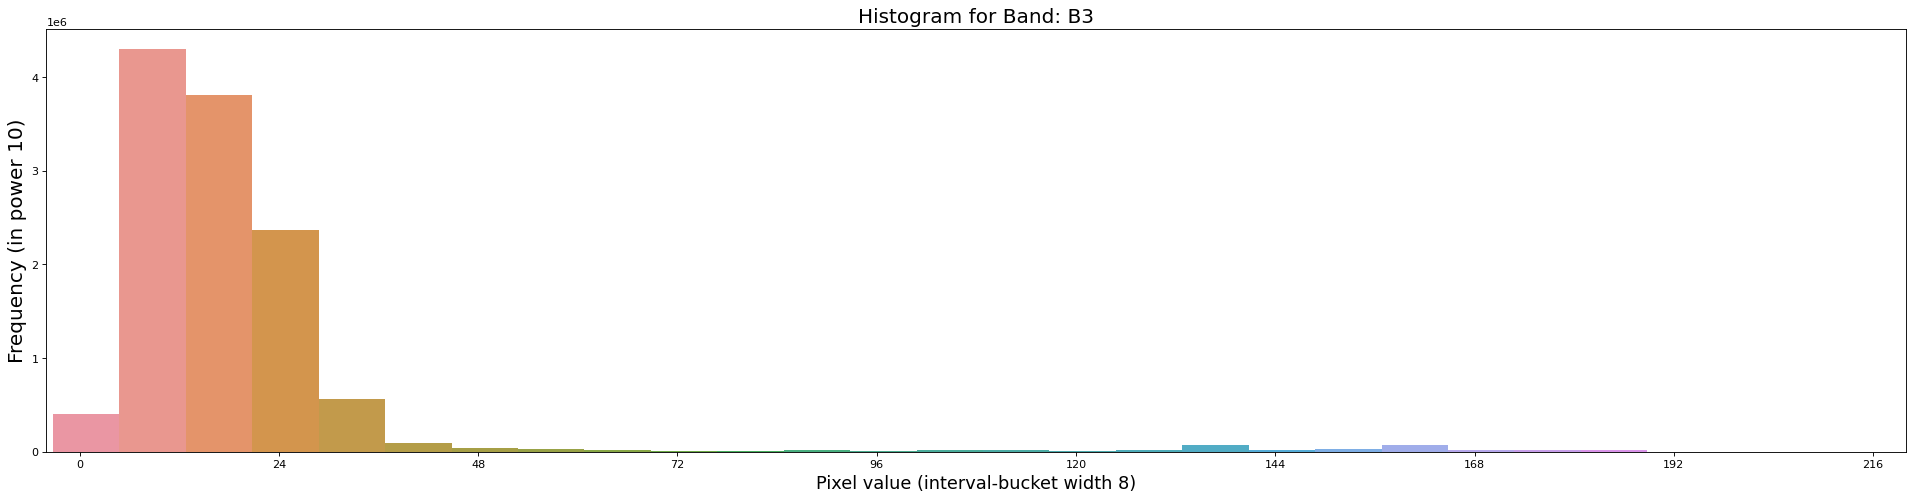

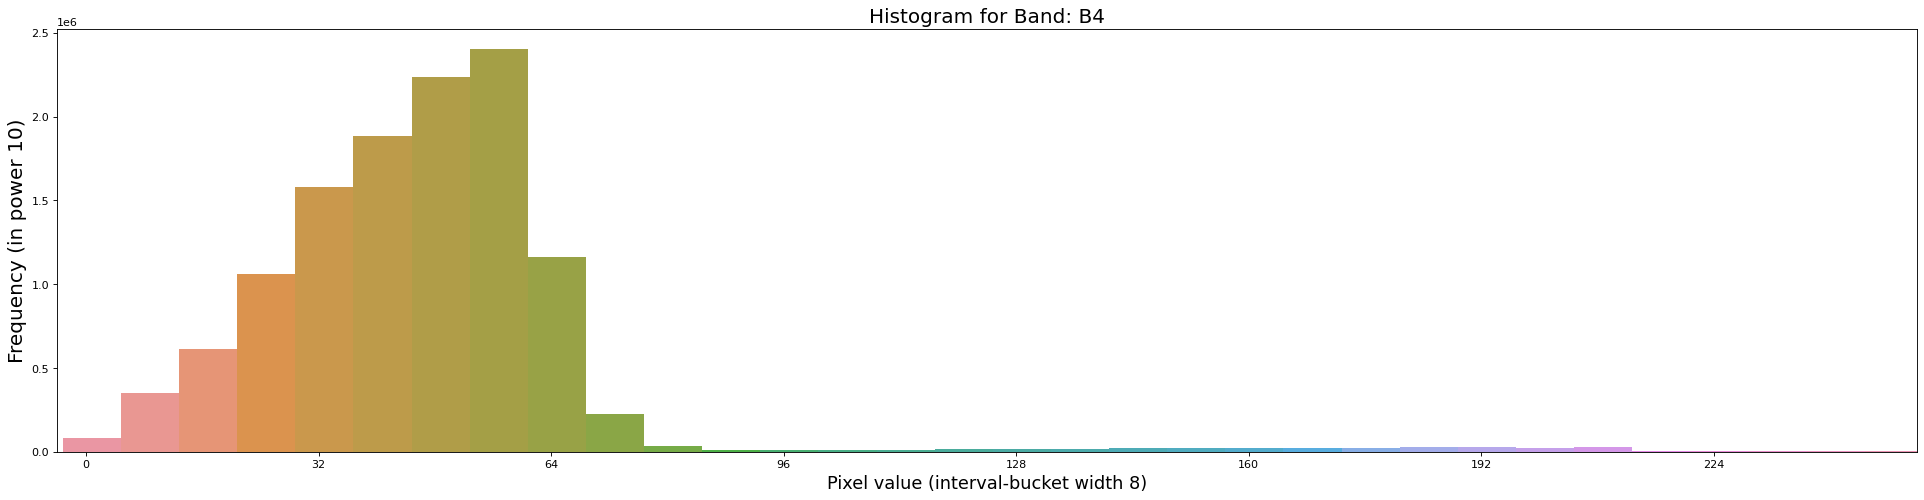

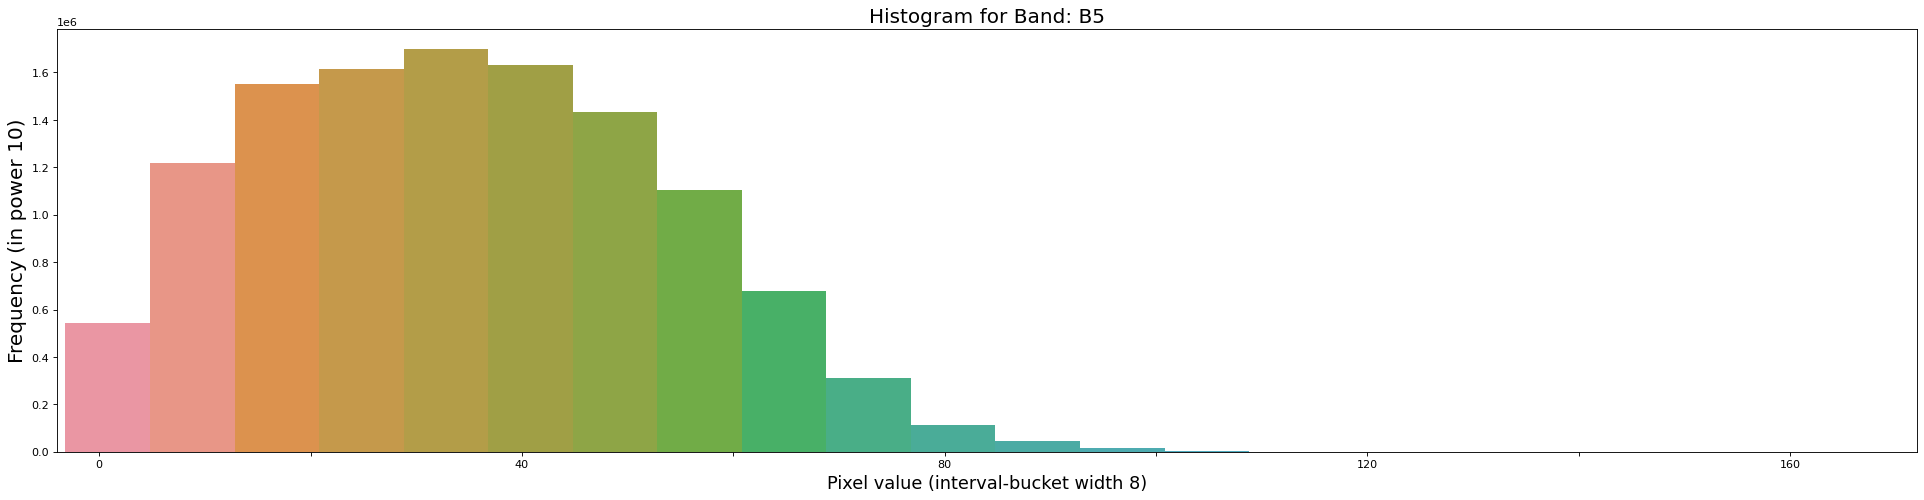

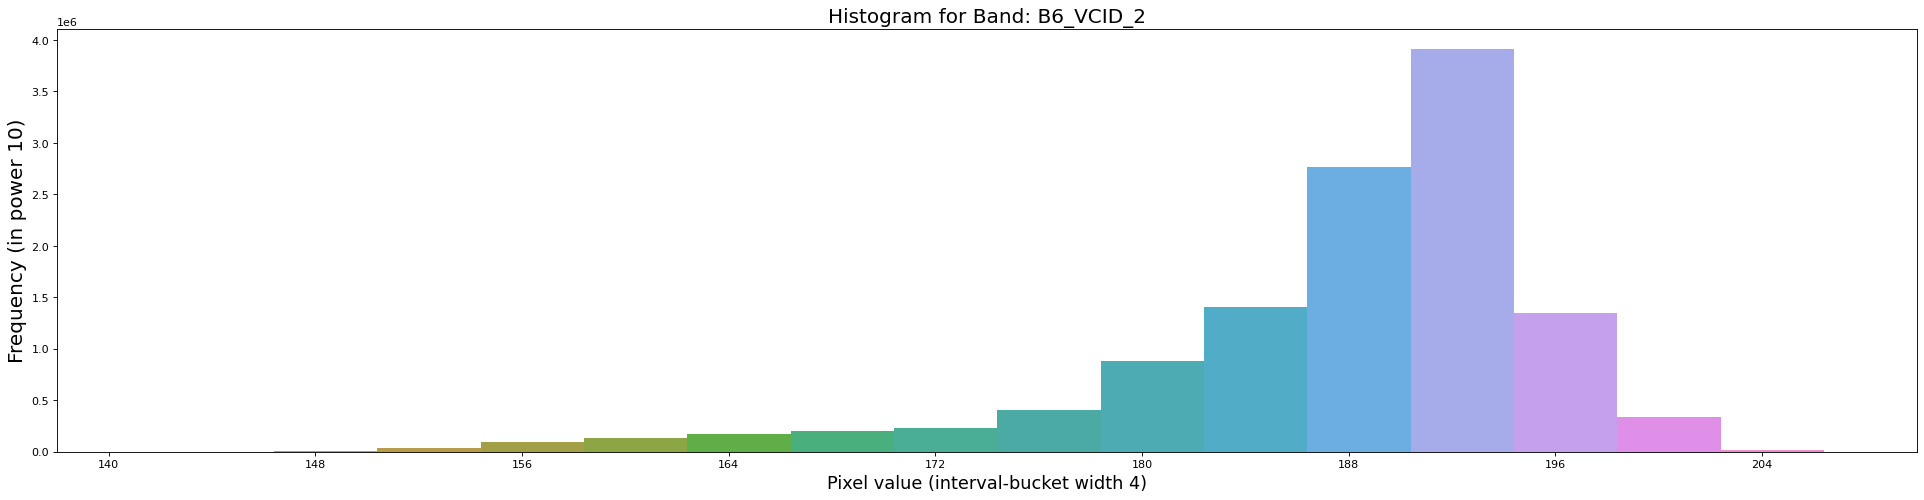

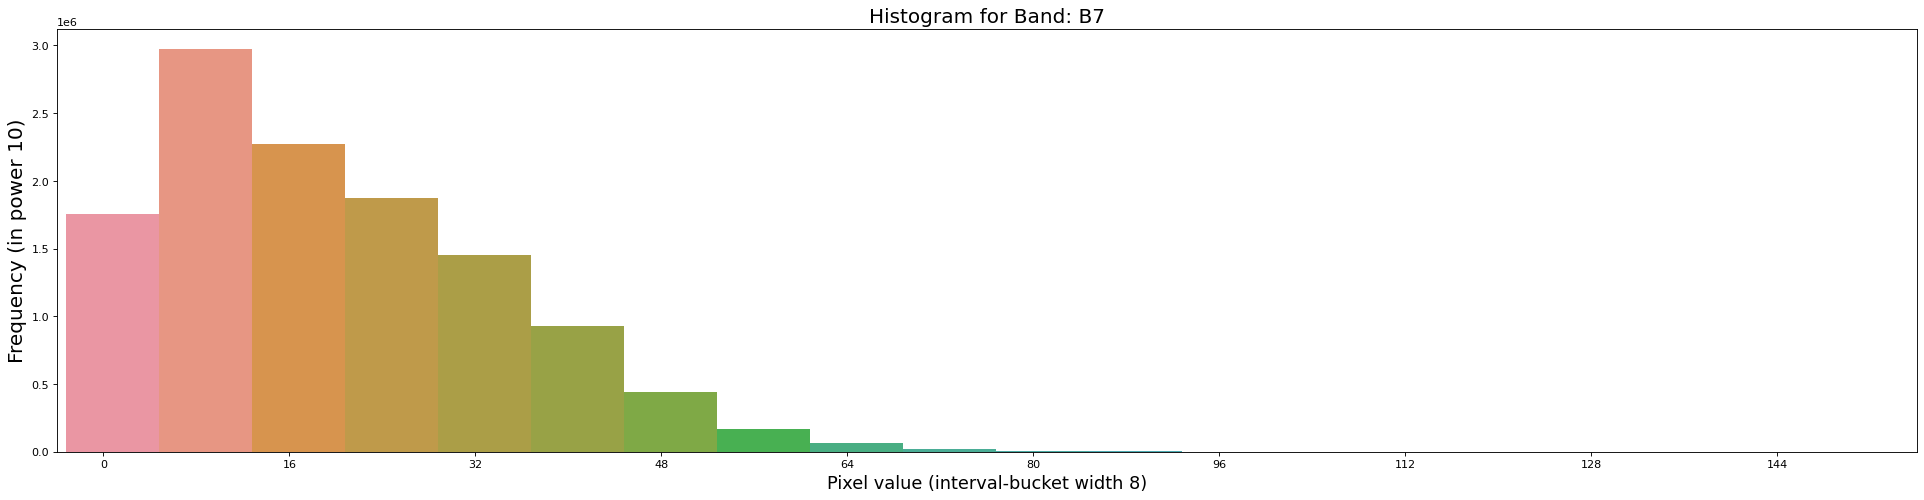

In [39]:

for bnd in bands:
    # plot a bar chart
    
    y=histogram[bnd]['histogram']
    x=[]
    for i in range(len(y)):
        x.append(histogram[bnd]['bucketMin']+i*histogram[bnd]['bucketWidth'])
    data = pd.DataFrame({'x':x, 
                             'y':y})

    # Draw Plot
    fig, ax = plt.subplots(figsize=(30, 7), dpi=80)

    sns.barplot(
        data= data,
        x= 'x',
        y= 'y',
        ax=ax
    )
    # For every axis, set the x and y major locator
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    
    
    # Adjust width gap to zero 
    for patch in ax.patches:
        current_height = patch.get_width()
        patch.set_width(1)
        patch.set_y(patch.get_y() + current_height - 1)
    
    # figure label and title 
    plt.title('Histogram for Band: {}'.format(bnd), fontsize=18)
    plt.ylabel('Frequency (in power 10)', fontsize=18)
    plt.xlabel('Pixel value (interval-bucket width {})'.format(histogram[bnd]['bucketWidth']), fontsize=16)
    # save the fihure as JPG file
    fig.savefig('figure/fig-{}.jpg'.format(bnd))